## 지도 학습과 비지도 학습
지도는 입력→라벨 예측 학습, 비지도는 라벨 없이 구조/패턴 발견.  
지도는 정답 라벨 필요, 비지도는 입력만 사용

K-Means는 데이터를 K개의 군집으로 분할하는 비지도 클러스터링 알고리즘  
각 군집은 해당 군집의 평균(centroid)에 가장 가까운 점들의 집합으로 정의

In [22]:
# Step 1: 라이브러리 임포트 및 데이터 로드
# 설명: 분석에 필요한 모듈을 불러오고 iris 데이터를 로드합니다.
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# iris 데이터셋 로드 (numpy 배열과 메타데이터 포함)
iris = load_iris()

In [23]:
# Step 1.1: 처음 5개 샘플을 미리 보기
# 설명: iris.data와 iris.target의 앞쪽 5개 항목을 확인합니다.
print('iris.data shape =', iris.data.shape)
print('iris.target shape =', iris.target.shape)
print('첫 5개 샘플 (numpy 배열):')
print(iris.data[:5])
print('첫 5개 라벨:')
print(iris.target[:5])
# DataFrame 형식으로 보기 (컬럼명에서 단위 제거)
cols_tmp = [each[:-5] for each in iris.feature_names]
pd.DataFrame(iris.data[:5], columns=cols_tmp)


iris.data shape = (150, 4)
iris.target shape = (150,)
첫 5개 샘플 (numpy 배열):
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
첫 5개 라벨:
[0 0 0 0 0]


,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
# Step 2: feature 이름 확인
# 설명: 원본 feature 이름(단위 포함)을 확인합니다.
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [25]:
# Step 3: 컬럼명 정리
# 설명: '(cm)' 등 단위를 제거하여 간단한 컬럼명으로 변환합니다.
cols = [each[:-5] for each in iris.feature_names]
cols

['sepal length', 'sepal width', 'petal length', 'petal width']

In [26]:
# Step 4: DataFrame 생성 및 샘플 확인
# 설명: iris 데이터로 DataFrame을 만들고 처음 몇 행을 확인합니다.
iris_df = pd.DataFrame(data=iris.data, columns=cols)
iris_df.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
# 4.1 편의상 두 개의 특성만 선택
feature = iris_df[['petal length', 'petal width']]
feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [28]:
# Step 5: KMeans 모델 생성 및 학습
# 설명: KMeans(n_clusters=3)를 생성하고 주어진 feature에 대해 학습합니다.
# 주의: 'feature' 변수는 학습에 사용할 2차원 배열(DataFrame or ndarray)이어야 합니다.
from sklearn.cluster import KMeans;
model = KMeans(n_clusters=3)
model.fit(feature)
# 학습이 완료되면 model 객체에 학습 결과가 저장됩니다.

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [29]:
# Step 6: 학습된 샘플 레이블 확인
# 설명: model.labels_ 속성은 각 샘플이 할당된 클러스터 인덱스를 반환합니다.
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [30]:
# Step 7: 클러스터 중심(centroids) 확인
# 설명: model.cluster_centers_는 각 클러스터의 중심 좌표를 담고 있습니다.
model.cluster_centers_

array([[4.29259259, 1.35925926],
       [1.462     , 0.246     ],
       [5.62608696, 2.04782609]])

In [31]:
# Step 8: 예측값을 DataFrame에 추가
# 설명: model.predict로 각 샘플의 클러스터를 예측하여 원본 feature에 'cluster' 컬럼으로 추가합니다.
import pandas as pd
predict = pd.DataFrame(model.predict(feature), columns=["cluster"])
# feature가 DataFrame인 경우에만 concat이 자연스럽게 동작합니다.
feature = pd.concat([feature, predict], axis=1)
feature.head()

,petal length,petal width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


In [34]:
feature.groupby('cluster').size()

cluster
0    54
1    50
2    46
dtype: int64

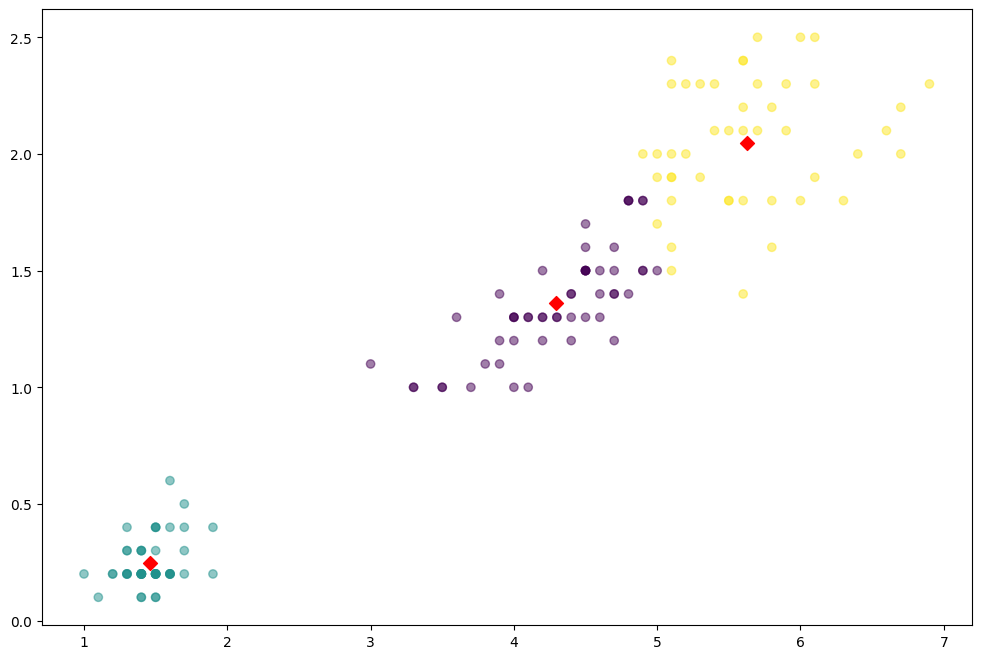

In [ ]:
# Step 9: 클러스터 중심 시각화
# 설명: cluster 컬럼과 centroid 좌표를 이용해 산점도로 군집 분포와 중심을 표시합니다.
# 9-1) matplotlib 임포트: 플롯 그리기에 사용합니다.
import matplotlib.pyplot as plt
# 9-2) cluster_centers_를 DataFrame으로 변환하여 컬럼명을 지정합니다.
centers = pd.DataFrame(
                model.cluster_centers_,
                columns=["petal length", "petal width"]
                )
# 9-3) 중심 좌표를 x/y로 분리하여 플롯에 사용합니다.
center_x = centers["petal length"]
center_y = centers["petal width"]
# 9-4) 플롯 캔버스 크기를 설정합니다.
plt.figure(figsize=(12, 8))
# 9-5) 각 샘플을 색(c=cluster)으로 구분하여 산점도로 표시합니다. alpha로 투명도 조절.
plt.scatter(feature["petal length"], feature["petal width"], c=feature["cluster"], alpha=0.5)
# 9-6) 클러스터 중심은 붉은 다이아몬드 마커로 강조합니다.
plt.scatter(center_x, center_y, s=50, marker="D", c="r")
# 9-7) 화면에 플롯을 표시합니다.
plt.show()